In [1]:
# Importing necessary packages

import pandas as pd
import numpy as np
import random as rnd

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report 

from sklearn.svm import  SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the Data

In [5]:
# Load the raw data
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Exploratory Data Analysis

In [6]:
# Checking the number of columns and rows the data contains i.e., the shape of the data
data.shape

(1200, 28)

In [7]:
# The different features available in the data
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
# To define each data type of every predictors in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [9]:
# To check whether the data contains any blank or Null values
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [10]:
# To determine the mean and avg of Numerical Predictors
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [11]:
# Distribtion of Categorical Predictors
data.describe(include = ['O'])

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E100527,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


##  Department wise performance Analysis

In [12]:
dep_pef = data.iloc[:,[5,27]].copy()

# Determining the mean performance of all the department and plotting it.
dep_pef.groupby(by = 'EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [13]:
dep_pef.groupby(by = 'EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

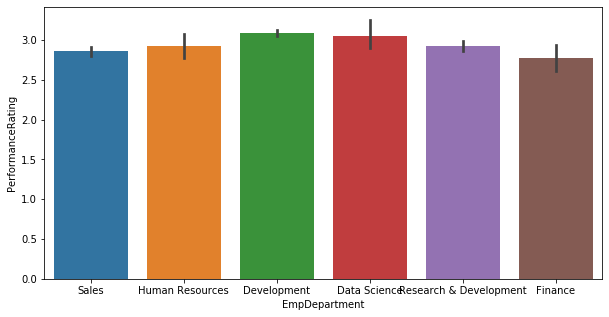

In [14]:
plt.figure(figsize=(10,5))
sb.barplot(dep_pef['EmpDepartment'], dep_pef['PerformanceRating'])

In [16]:
dep_pef.groupby(by = 'EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [17]:
# df to differentiate the performance rating according to different deparments
dep = pd.get_dummies(dep_pef['EmpDepartment'])
per = pd.DataFrame(dep_pef['PerformanceRating'])
dep_rat = pd.concat([dep,per],axis=1)
dep_rat

,Data Science,Development,Finance,Human Resources,Research & Development,Sales,PerformanceRating
0,0,0,0,0,0,1,3
1,0,0,0,0,0,1,3
2,0,0,0,0,0,1,4
3,0,0,0,1,0,0,3
4,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...
1195,0,0,0,0,0,1,4
1196,0,1,0,0,0,0,3
1197,0,1,0,0,0,0,3
1198,1,0,0,0,0,0,3


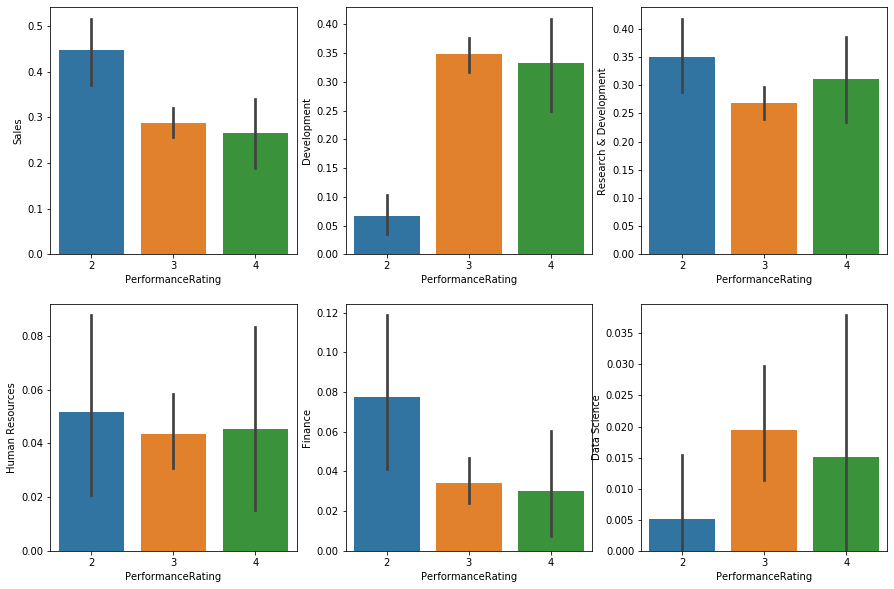

In [18]:
distr, axes = plt.subplots(2, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining the colormap scheme
s = np.linspace(0, 3, 10)
cmap = sb.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Comparing PerformanceRating with Sales
x = dep_rat['PerformanceRating']
y = dep_rat['Sales']
sb.barplot(x, y, ax=axes[0,0])

cmap = sb.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Comparing PerformanceRating with Development
x = dep_rat['PerformanceRating']
y = dep_rat['Development']
sb.barplot(x, y, ax=axes[0,1])

cmap = sb.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Comparing PerformanceRating with Research & Development 
x = dep_rat['PerformanceRating']
y = dep_rat['Research & Development']
sb.barplot(x, y, ax=axes[0,2])

# Comparing PerformanceRating with Sales
x = dep_rat['PerformanceRating']
y = dep_rat['Human Resources']
sb.barplot(x, y, ax=axes[1,0])

cmap = sb.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Comparing PerformanceRating with Development
x = dep_rat['PerformanceRating']
y = dep_rat['Finance']
sb.barplot(x, y, ax=axes[1,1])

cmap = sb.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Comparing PerformanceRating with Research & Development 
x = dep_rat['PerformanceRating']
y = dep_rat['Data Science']
sb.barplot(x, y, ax=axes[1,2])

### Data Processing

In [19]:
# One-hot Encoding
enc = LabelEncoder()
data.Gender = enc.fit_transform(data.Gender)
data.EducationBackground = enc.fit_transform(data.EducationBackground)
data.MaritalStatus = enc.fit_transform(data.MaritalStatus)
data.EmpDepartment = enc.fit_transform(data.EmpDepartment)
data.EmpJobRole = enc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency = enc.fit_transform(data.BusinessTravelFrequency)
data.OverTime = enc.fit_transform(data.OverTime)
data.Attrition = enc.fit_transform(data.Attrition)
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null int32
EducationBackground             1200 non-null int32
MaritalStatus                   1200 non-null int32
EmpDepartment                   1200 non-null int32
EmpJobRole                      1200 non-null int32
BusinessTravelFrequency         1200 non-null int32
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null int32
EmpLastS

## Distribution of the data set 

- It is important to understand the how the predictors are distributed through out the data set.
- KDE Plot Visualization is used to depict the overall idea about the density and majority of both numerical and categorical features present in the data set.

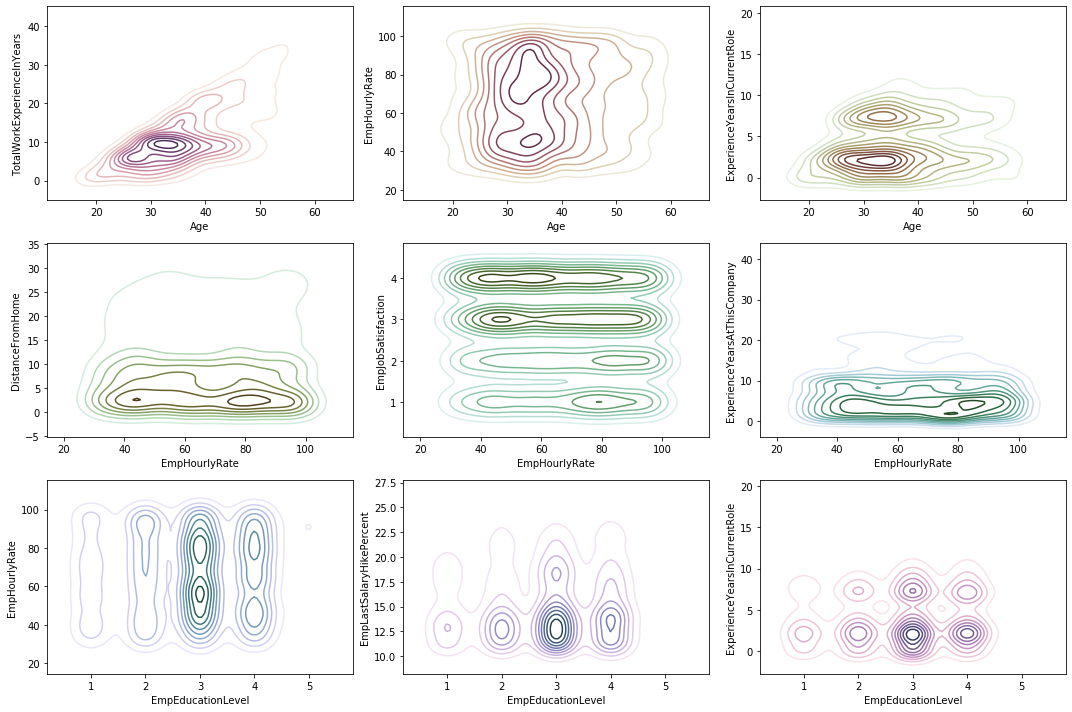

In [21]:
# Plotting the KDEplots 
# To understand the employee's age and education predictors and  how do they play an role in employee performance analysis
dist, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining the colormap scheme
s = np.linspace(0, 3, 10)
cmap = sb.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Comparing Age with Total work Experience in Years
x = data['Age']
y = data['TotalWorkExperienceInYears']
sb.kdeplot(x, y, cmap = cmap, ax=axes[0,0])

cmap = sb.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Comparing Age with EmpHourlyRate
x = data['Age']
y = data['EmpHourlyRate']
sb.kdeplot(x, y, cmap=cmap, ax=axes[0,1])

cmap = sb.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Comparing Age with ExperienceYearsInCurrentRole
x = data['Age']
y = data['ExperienceYearsInCurrentRole']
sb.kdeplot(x, y, cmap=cmap, ax=axes[0,2])

cmap = sb.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Comparing EmpHourlyRate with DistanceFromHome
x = data['EmpHourlyRate']
y = data['DistanceFromHome']
sb.kdeplot(x, y, cmap=cmap,  ax=axes[1,0])

cmap = sb.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Comparing EmpHourlyRate with EmpJobSatisfaction
x = data['EmpHourlyRate']
y = data['EmpJobSatisfaction']
sb.kdeplot(x, y, cmap=cmap,  ax=axes[1,1])

cmap = sb.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Comparing EmpHourlyRate with ExperienceYearsAtThisCompany
x = data['EmpHourlyRate']
y = data['ExperienceYearsAtThisCompany']
sb.kdeplot(x, y, cmap=cmap,  ax=axes[1,2])

cmap = sb.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Comparing EmpEducationLevel with EmpHourlyRate
x = data['EmpEducationLevel']
y = data['EmpHourlyRate']
sb.kdeplot(x, y, cmap=cmap,  ax=axes[2,0])

cmap = sb.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Comparing EmpEducationLevel with EmpLastSalaryHikePercent
x = data['EmpEducationLevel']
y = data['EmpLastSalaryHikePercent']
sb.kdeplot(x, y, cmap=cmap,  ax=axes[2,1])

cmap = sb.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Comparing EmpEducationLevel with ExperienceYearsInCurrentRole
x = data['EmpEducationLevel']
y = data['ExperienceYearsInCurrentRole']
sb.kdeplot(x, y, cmap=cmap,  ax=axes[2,2])

dist.tight_layout()

### Categorical Predictors Distribution
- There are nineteen different job roles present in the company.
- Majority of the employees have a high job satisfaction level.
- According to the Gender variance, 60% are Male and 40% Female employees in the company.
- Only 11% of employees working the company achieved a performance rating of level-4.
- Overall percentage of employees working overtime is 30%.

### Numerical Predictors Distribution

- Majority of the employees working the company are lying beetween 25 o 40 age count.
- Majority of the employees are coming to work from their home from the range of 0 to 5 units which can either be in km or miles.
- Majority of the employees have an work experience of atleast 2 years before joining this company.
- Majority of the employees worked atleast 5 years in the company.
- Majority of the employees get a salary hike between 11 to 15%.

In [22]:
# Finding out the correlation coefficient 
data.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


### Correlation of Predictors
- From the correlation coefficient, we can understand how the predictors are related to one another. Therfore, we can select the important predictors which affect the performance rating in the given data set.
- The important predictors were selected according to their correlation coefficient with performance rating which is having a greater value than 0.1.

In [23]:
# Dropping the Employee Number Column as it does not have any affect in the performance analysis
data.drop(['EmpNumber'], inplace = True, axis=1)

In [24]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [25]:
# Defining Features (X) and Target (y) Variables
y = data.PerformanceRating
# X = data.iloc[:,:-1] We see a drop in accuracy when all predictors where selected
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]]
# Taking only variables having correlation coefficient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2


In [26]:
# Defining train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size=0.3)

In [27]:
# Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train.shape

(840, 9)

In [29]:
X_test.shape

(360, 9)

# Modelling 
- The algorithms used are Support Vector Machine, Decision Tree with GridSearchCS, Artificial Neural Network, XGBoost Classifier and Random Forest with GridSearchCV.
- The Random Forest model with GridSearchCV gave a maximum accuracy of 93.05%.

## 1. SVM

In [30]:
# Training the model
model_svc = SVC(kernel = 'rbf', 
                C=100,  
                random_state=10)
model_svc.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
# Predicting the model
y_predict_svc = model_svc.predict(X_test)

In [32]:
# Accuracy Score 
print(accuracy_score(y_test,y_predict_svc))
print(classification_report(y_test,y_predict_svc))

0.8444444444444444
              precision    recall  f1-score   support

           2       0.74      0.78      0.76        63
           3       0.92      0.88      0.90       264
           4       0.54      0.67      0.59        33

    accuracy                           0.84       360
   macro avg       0.73      0.78      0.75       360
weighted avg       0.85      0.84      0.85       360



In [33]:
pd.crosstab(y_test,y_predict_svc)

col_0,2,3,4
PerformanceRating,,,
2,49,13,1
3,13,233,18
4,4,7,22


# 2. Decision Tree Classifier with GridSearch CV

In [34]:
# Training the model
model_dt = DecisionTreeClassifier(random_state=42, splitter = 'best')
rf_params = [{'min_samples_split':[2,3,4,5],
              'criterion':['gini']},
             {'min_samples_split':[2,3,4,5],
              'criterion':['entropy']}]

model_gridtree = GridSearchCV(estimator = model_dt, param_grid = rf_params, scoring = 'accuracy', cv=10)
model_gridtree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {

In [35]:
model_gridtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [36]:
# Predicting the model
y_predict_dt = model_gridtree.predict(X_test)

In [37]:
# Accuracy Score 
print(accuracy_score(y_test,y_predict_dt))
print(classification_report(y_test,y_predict_dt))

0.9055555555555556
              precision    recall  f1-score   support

           2       0.85      0.83      0.84        63
           3       0.94      0.95      0.94       264
           4       0.75      0.73      0.74        33

    accuracy                           0.91       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.90      0.91      0.90       360



In [38]:
pd.crosstab(y_test,y_predict_dt)

col_0,2,3,4
PerformanceRating,,,
2,52,10,1
3,7,250,7
4,2,7,24


# 3. Artificial Neural Network

In [39]:
# Training the model
model_ann = MLPClassifier(hidden_layer_sizes=(100,100,100),
                          batch_size = 10,
                          learning_rate_init = 0.01, 
                          random_state=10, 
                          max_iter = 200)
model_ann.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
# Predicting the model
y_predict_ann = model_ann.predict(X_test)

In [41]:
# Accuracy Score 
print(accuracy_score(y_test,y_predict_ann))
print(classification_report(y_test,y_predict_ann))

0.9111111111111111
              precision    recall  f1-score   support

           2       0.84      0.83      0.83        63
           3       0.94      0.95      0.95       264
           4       0.83      0.73      0.77        33

    accuracy                           0.91       360
   macro avg       0.87      0.84      0.85       360
weighted avg       0.91      0.91      0.91       360



In [42]:
pd.crosstab(y_test,y_predict_ann)

col_0,2,3,4
PerformanceRating,,,
2,52,10,1
3,8,252,4
4,2,7,24


# 4. XGBoost Classifier

In [43]:
# Training the model
model_xgb = XGBClassifier(max_depth=5,
                          gamma=2, 
                          learning_rate=0.5, 
                          random_state=0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
# Predicting the model
y_predict_xgb = model_ann.predict(X_test)

In [45]:
# Accuracy Score 
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9111111111111111
              precision    recall  f1-score   support

           2       0.84      0.83      0.83        63
           3       0.94      0.95      0.95       264
           4       0.83      0.73      0.77        33

    accuracy                           0.91       360
   macro avg       0.87      0.84      0.85       360
weighted avg       0.91      0.91      0.91       360



In [46]:
pd.crosstab(y_test,y_predict_xgb)

col_0,2,3,4
PerformanceRating,,,
2,52,10,1
3,8,252,4
4,2,7,24


# 5. Random Forest with GridSearchCV

In [47]:
# Training the model
model_rdm = RandomForestClassifier(random_state=33, 
                                   n_estimators = 23)

rf_params = [{'min_samples_split':[2,3,4,5],'criterion':['gini', 'entropy']},{'min_samples_leaf':[1,2,3]}]
model_gridrdm = GridSearchCV(estimator = model_rdm, param_grid = rf_params, scoring = 'accuracy', cv=10)
model_gridrdm.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=23, n_jobs=None,
                                              oob_score=False, random_state=33,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'cr

In [48]:
model_gridrdm.best_params_

{'criterion': 'gini', 'min_samples_split': 4}

In [49]:
# Predicting the model
y_predict_rdm = model_gridrdm.predict(X_test)

In [50]:
# Accuracy Score 
print(accuracy_score(y_test,y_predict_rdm))
print(classification_report(y_test,y_predict_rdm))

0.9305555555555556
              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360



In [51]:
pd.crosstab(y_test,y_predict_rdm)

col_0,2,3,4
PerformanceRating,,,
2,56,7,0
3,4,255,5
4,1,8,24
